In [1]:
import random

import networkx as nx
import numpy as np

In [2]:
def edge_labels(g):
    return dict([((u, v,), d['weight']) for u, v, d in g.edges(data=True)])

#### 1. Dijkstra's Algorithm

_Case1_: a simple (undirected) graph with 5 edges (all have weight = 1)

In [3]:
g1 = nx.Graph()

edges = [(1, 2, 1), (1, 3, 1), (2, 4, 1), (3, 4, 1), (4, 5, 1)]
g1.add_weighted_edges_from(edges)

Visualise the graph

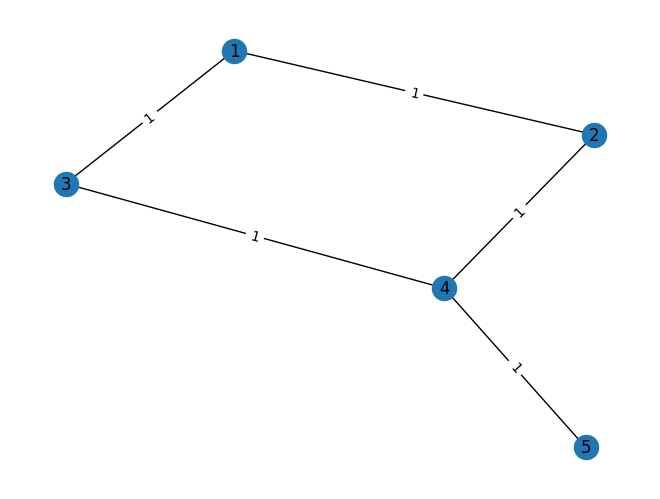

In [4]:
pos1 = nx.spring_layout(g1)
nx.draw(g1, pos1, with_labels=True)
nx.draw_networkx_edge_labels(g1, pos1, edge_labels=edge_labels(g1));

Find the/a shortest path

In [5]:
shortest_path = nx.dijkstra_path(g1, source=1, target=5, weight='weight')
print("The shortest path from 1 to 5:", shortest_path)

The shortest path from 1 to 5: [1, 2, 4, 5]


_Case2_: a simple (undirected) graph with 5 edges (with different weights)

In [6]:
g2 = nx.Graph()

edges = [(1, 2, 4), (1, 3, 2), (2, 4, 5), (3, 4, 1), (4, 5, 3)]
g2.add_weighted_edges_from(edges)

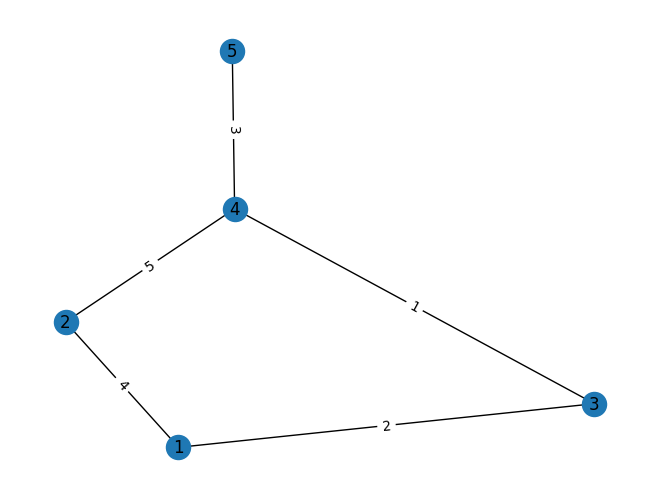

In [7]:
pos2 = nx.spring_layout(g2)
nx.draw(g2, pos2, with_labels=True)
nx.draw_networkx_edge_labels(g2, pos2, edge_labels=edge_labels(g2));

In [8]:
shortest_path = nx.dijkstra_path(g2, source=1, target=5, weight='weight')
print("Najkrótsza ścieżka:", shortest_path)

Najkrótsza ścieżka: [1, 3, 4, 5]


_Case3_: a (undirected) graph with 15 edges

In [9]:
random.seed(42)

In [10]:
g3 = nx.Graph()

nodes = list(range(1, 11))
for _ in range(15):  # Dodajemy 15 krawędzi
    u, v = random.sample(nodes, 2)  # Wybieramy dwa różne węzły
    weight = random.randint(1, 10)  # Waga krawędzi w zakresie 1-10
    g3.add_edge(u, v, weight=weight)

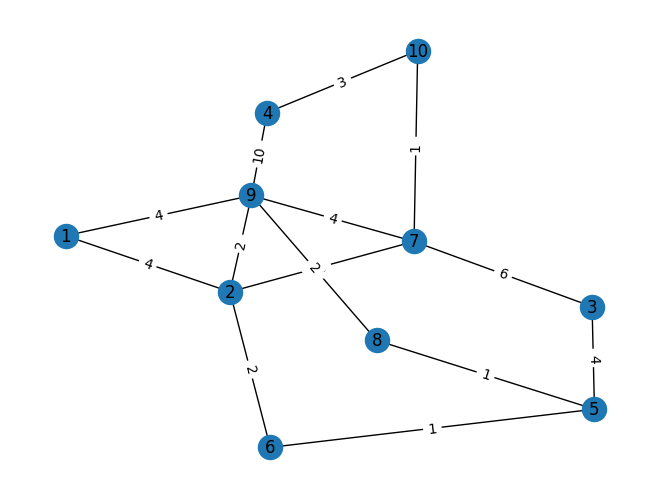

In [11]:
pos3 = nx.spring_layout(g3)
nx.draw(g3, pos3, with_labels=True)
nx.draw_networkx_edge_labels(g3, pos3, edge_labels=edge_labels(g3));

In [12]:
source, target = 1, 10
sp_weight, sp_path = nx.single_source_dijkstra(g3, source=source, target=target, weight='weight')

print(f"The shortest path from {source} to {target}: {sp_path}. Its total weight: {sp_weight}")

The shortest path from 1 to 10: [1, 9, 7, 10]. Its total weight: 9


#### 2. A\* algorithm

In [13]:
np.random.seed(2)

In [14]:
def h0(u, v):
    return 0

def h1_fact(pos):
    return lambda u, v: np.floor(np.linalg.norm(np.array(pos[u]) - np.array(pos[v])))

def h2_fact(pos):
    return lambda u, v: 10 * np.ceil(np.linalg.norm(np.array(pos[u]) - np.array(pos[v])))

In [15]:
def create_graph(pos):
    def weighted_edge(s, e):
        rnd_dl = np.linalg.norm(np.array(pos[s]) - np.array(pos[e]))
        return s, e, np.round(rnd_dl + 0.5 + np.random.random(), 1)

    ns = list(pos.keys())
    es = [
        weighted_edge(1, 2),
        weighted_edge(1, 3),
        weighted_edge(2, 3),
        weighted_edge(2, 4),
        weighted_edge(2, 5),
        weighted_edge(3, 4),
        weighted_edge(4, 5),
        weighted_edge(4, 6),
        weighted_edge(5, 6)
    ]
    g = nx.Graph()
    g.add_nodes_from(ns)
    g.add_weighted_edges_from(es)

    return g

In [16]:
positions = {1: (0, 0), 2: (2, 1), 3: (1, 3), 4: (4, 4), 5: (5, 3), 6: (6, 4)}
g4 = create_graph(positions)
edge_labels = dict([((u, v,), d['weight']) for u, v, d in g4.edges(data=True)])

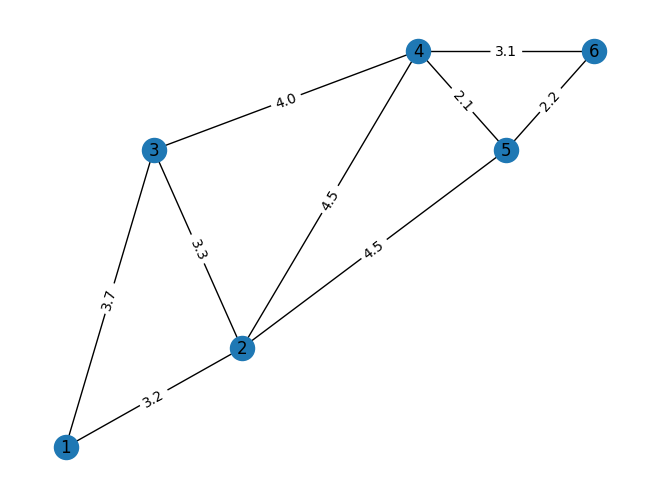

In [17]:
nx.draw(g4, positions, with_labels=True)
nx.draw_networkx_edge_labels(g4, positions, edge_labels=edge_labels);

In [18]:
as_src, as_dst = 1, 6

In [19]:
as_sp1 = nx.astar_path(g4, source=as_src, target=as_dst, weight='weight', heuristic=h0)
print(f"The shortest path from {as_src} to {as_dst} using h0 (~Dijkstra): {as_sp1}")

The shortest path from 1 to 6 using h0 (~Dijkstra): [1, 2, 5, 6]


In [20]:
as_sp2 = nx.astar_path(g4, source=as_src, target=as_dst, weight='weight', heuristic=h1_fact(positions))
print(f"The shortest path from {as_src} to {as_dst} using h1: {as_sp2}")

The shortest path from 1 to 6 using h1: [1, 2, 5, 6]


In [21]:
as_sp3 = nx.astar_path(g4, source=as_src, target=as_dst, weight='weight', heuristic=h2_fact(positions))
print(f"The shortest path from {as_src} to {as_dst} using h2: {as_sp3}")

The shortest path from 1 to 6 using h2: [1, 2, 4, 6]
